In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from importlib.metadata import version
print(f"Numpy Version: {version("numpy")}")
# print(f"Matplotlib Version: {mmatplotlib.__version__})
SEED = 42

Numpy Version: 2.1.1


In [2]:
# Intuition
    # y = mX + b
        # where m and b are parameters

## Data

In [3]:
# Data
X, y = make_regression(n_samples=100,
                       n_features=1,
                       noise=1,
                       random_state=SEED)

In [4]:
X.shape, y.shape

((100, 1), (100,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=SEED)

(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((80, 1), (80,), (20, 1), (20,))

In [6]:
# Loss Function
def MSE(y_true, y_pred):
    assert y_pred.shape == y_true.shape, "Arrays must have the same shape"
    m, n = X.shape
    return np.mean((1 / m * (y_true - y_pred)) ** 2)

In [7]:
true_dummy = np.array([1, 2, 3])
pred_dummy = np.array([1, 44, 2])

MSE(true_dummy, pred_dummy)

np.float64(0.05883333333333332)

Text(0.5, 1.0, 'Distribution of plot')

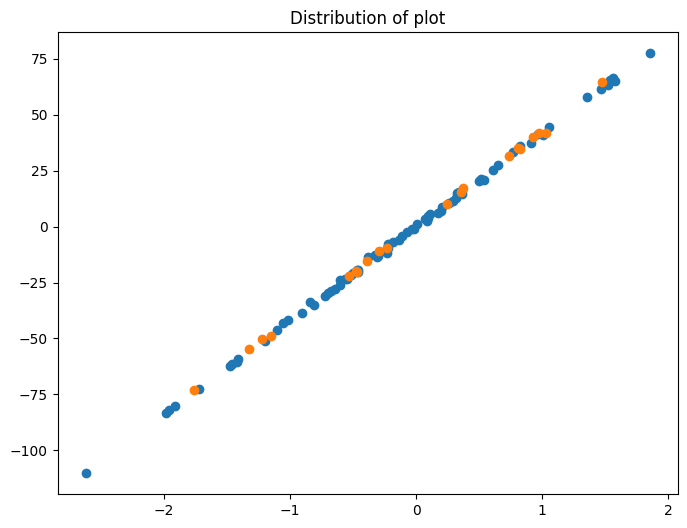

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.title("Distribution of plot")

## Algorithm

In [9]:
class LinearRegression:
    """ LinearRegression Task"""
    def __init__(self, lr: int, n_iters: int):
        """
        Args:
        lr(Learning Rate): Used for optimization
        n_iters(Number of iterations): Iteration step count
        """
        self.lr = lr
        self.n_iters = n_iters
        self.Weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.Weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.Weights) + self.bias
            dj_dw = (1 / n_samples) * np.dot(X.T, y_pred - y)
            dj_db = (1 / n_samples) * np.sum(y_pred - y)

            self.Weights -= self.lr * dj_dw
            self.bias -= self.lr * dj_db

        print("Fitted")

    def predict(self, X):
        return np.dot(X, self.Weights) + self.bias

In [19]:
regression = LinearRegression(lr = 1e-3, n_iters=3000)
regression.fit(X_train, y_train)

Fitted


In [20]:
y_pred = regression.predict(X_test)
print(f"Loss: {MSE(y_test, y_pred):.6f}")

Loss: 0.001412


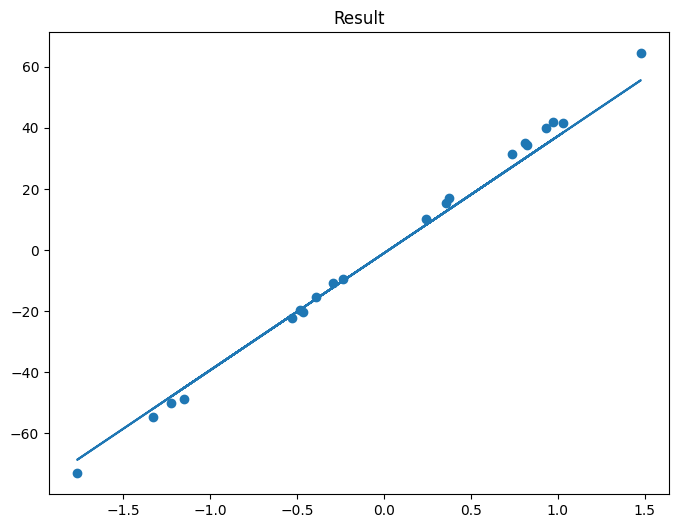

In [21]:
# New Plot
# for the train data
y_pred_line = y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test)
plt.title("Result")
plt.plot(X_test, y_pred_line, label="Prediction")
plt.show()

In [22]:
# Bruh😔